# Practical session: Multilayer Perceptron (MLP)

A Multilayer Perceptron (MLP) is a class of feedforward artificial neural networks (ANN) that consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. It uses layers of interconnected nodes (neurons) to learn and make predictions, typically employing activation functions and backpropagation during training.

<img width="300" alt="image" src="https://miro.medium.com/v2/resize:fit:1400/1*MF1q2Q3fbpYlXX8fZUiwpA.png">

## Overview

## Dataset 

The dataset is part of a large dataset maintained at the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It is used for a diabetes study conducted on Pima Indian women aged 21 and over living in Phoenix, the fifth largest city in the state of Arizona, USA. 

The dataset consists of **768 observations** and 8 numerical independent variables. The target variable is indicated as `outcome`; `1` represents a *positive diabetes test result*, and `0` represents a *negative result*.

### Features 

- `Pregnancies`: Number of pregnancies
- `Glucose`: Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
- `BloodPressure`: Diastolic Blood Pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour Serum insulin (uh/ml)
- `BMI`: Body mass index [weight in kg/(Height in m)]
- `DiabetesPedigreeFunction`: A function that calculates the likelihood of having diabetes based on our family members.
- `Age`: Age (years)
- `Outcome`: Information about whether the individual has diabetes or not. Affected by the disease (`1`) or not (`0`)


## Data loading

In [106]:
## Importing Libraries 

# Base libraries
import numpy as np
import pandas as pd
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier

## Default options and global variables
# Set number of decimal points to float type
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.precision', 2)
SEED = 2024


In [107]:
# Set the data path 
DATA_PATH="../data/diabetes/"

# Data loading
df = pd.read_csv(DATA_PATH + "diabetes.csv", index_col=None)

# Data dimension 
print("Dataset:",df.shape[0],"rows,",  df.shape[1], "columns")

Dataset: 768 rows, 9 columns


## Quick exploration

In [108]:
# Quick exploration 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Target variable

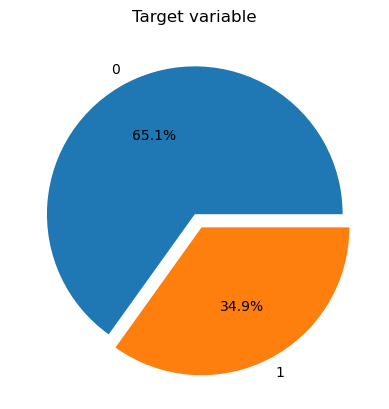

In [109]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0,0.1]).set_title('Target variable');
plt.ylabel(None)
plt.show()

## Pre-processing

In [110]:
# input / output
X = df.loc[:,'Pregnancies':'Age']
Y = df.loc[:,'Outcome']

# Dataset split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED)

print("Train: ", x_train.shape[0], "rows")
print("Test : ", x_test.shape[0], "rows")

Train:  460 rows
Test :  308 rows


## Modelling

### Model definition

`MLPClassifier` 

- `hidden_layer_sizes` : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.
- `max_iter`: Indicates the number of epochs.
- `activation`: The activation function for the hidden layers.
- `solver`: This parameter specifies the algorithm for weight optimization over the nodes.

In [127]:
EPOCHS=100
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=True, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS )

### Model fitting

In [128]:
# Training 
trained_model = model.fit(x_train, y_train)


Iteration 1, loss = 0.65627149
Iteration 2, loss = 0.63736174
Iteration 3, loss = 0.65752808
Iteration 4, loss = 0.64836338
Iteration 5, loss = 0.64881691
Iteration 6, loss = 0.64722462
Iteration 7, loss = 0.64651123
Iteration 8, loss = 0.64713039
Iteration 9, loss = 0.64651809
Iteration 10, loss = 0.64619225
Iteration 11, loss = 0.64335868
Iteration 12, loss = 0.64145287
Iteration 13, loss = 0.64297983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


### Model evaluation

In [129]:
## Evaluation
accuracy = trained_model.score(x_test, y_test)
print("Accuracy: ", accuracy )

Accuracy:  0.6558441558441559


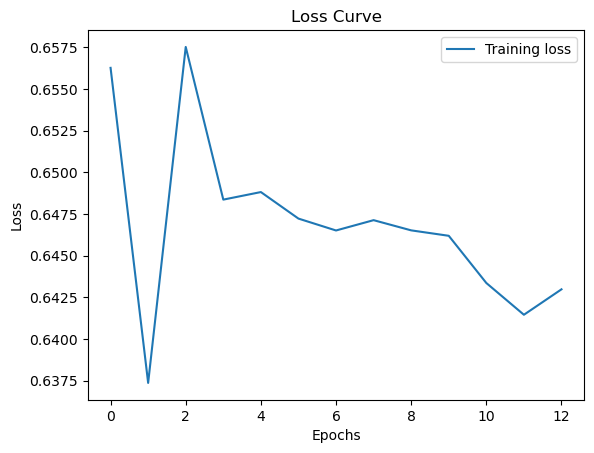

In [130]:
# Loss curve
def plot_loss_curve(model):
    plt.plot(model.loss_curve_, label='Training loss')
    if model.validation_scores_ != None:
        plt.plot(model.validation_scores_, label='Validation loss')
    plt.title("Loss Curve")
    plt.xlabel('Epochs')
    plt.legend()
    plt.ylabel('Loss')

plot_loss_curve(trained_model)

## Model improvements 

...